# Financial Inclusion in Africa Zindi Competition


Remember to read the competition details in the zindi platform, [Zindi Africa](https://zindi.africa)

In [1]:
# import important modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
np.random.seed(123)
warnings.filterwarnings('ignore')
%matplotlib inline 

## Load Dataset

In [2]:
# Import data
train_data = pd.read_csv('data/Train_v2.csv')
test_data = pd.read_csv('data/Test_v2.csv')

In [3]:
# print shape 
print('train data shape :', train_data.shape)
print('test data shape :', test_data.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


The above output show the number of rows and columns for train and test dataset 

In [4]:
# Inspect train Data
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


**Note:** Open the VariableDefinition file to understand the meaning of each variable in this dataset 

In [5]:
submission = pd.read_csv('data/SubmissionFile.csv')
submission.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0


## Explolatory Data Analysis 

This is the process of finding some insights from you dataset before create predictive models.

**Note:** This is important steps in your Data science workflow.

In [6]:
#show list of columns 
list(train_data.columns)  

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [6]:
## show Some information about the dataset 
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


The outshow shows the list of variables , sizes and data types in each variables. This will help you to know what feature engineering techniques you can apply.

In [7]:
# Check for missing values
print('missing values:', train_data.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.

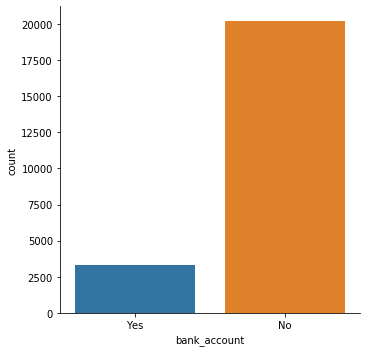

In [8]:
# Explore Target distribution 

sns.catplot(x="bank_account", kind="count", data=train_data)

In [9]:
train_data['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

The data shows that we have large number of **no** class than **yes** class  in our target variable 

In my previous article , I explained more about Exploratory data analysis with the financial Inclusion in Africa dataset.You can read and download the notebook [here](https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

## Data Preprocessing 

In [10]:
#import preprocessing module 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 

# Convert target label to numerical Data
le = LabelEncoder()
train_data['bank_account'] = le.fit_transform(train_data['bank_account'])

#Separate training features from target
X_train = train_data.drop(['bank_account'], axis=1)
y_train = train_data['bank_account']

X_train.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [11]:
# our target 
y_train.head() 

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int32

I have created a simple preprocessing function to handle 

- conversion of data types
- convert categorical features to numerical by one-hot encoding method and label encoding
- drop uniqueid variable 
- scaling our data into range of 0 and 1 

In [12]:
# function to preprocess our data from train models

def preprocessing_data(data):

    # Convert the following numerical labels from integer to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(
        float
    )

    # categorical features to be converted by One Hot Encoding
    categ = [
        "relationship_with_head",
        "marital_status",
        "education_level",
        "job_type",
        "country",
    ]

    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)

    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    return data

In [13]:
# preprocess the train data 
processed_train_data = preprocessing_data(X_train)

In [14]:
# the first train row 
processed_train_data[:1]

array([[1.       , 0.       , 1.       , 0.1      , 0.0952381, 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 1.       ,
        0.       , 0.       , 1.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 1.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 1.       , 1.       , 0.       , 0.       ,
        0.       ]])

In [18]:
# preprocess the test data
processed_test_data = preprocessing_data(test_data)

In [19]:
# the first test row
processed_test_data[:1]

array([[1.        , 1.        , 1.        , 0.10526316, 0.16666667,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ]])

In [20]:
# shape of the processed train set
processed_train_data.shape 

(23524, 37)

In [21]:
# shape of the processed test set
processed_test_data.shape 

(10086, 37)

### Model Building and Experiment 

In [22]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(processed_train_data, y_train, stratify = y_train,
                                                  test_size = 0.1, random_state=42)

In [23]:
#import classifier algorithm here 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier 

# create models 
lg_model = LogisticRegression()
rf_model = RandomForestClassifier()
kn_model = KNeighborsClassifier()
et_model = ExtraTreesClassifier()
xg_model = XGBClassifier()


#fitting the models
lg_model.fit(X_Train,y_Train)
rf_model.fit(X_Train,y_Train)
kn_model.fit(X_Train,y_Train)
et_model.fit(X_Train,y_Train)
xg_model.fit(X_Train,y_Train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [24]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
lg_y_pred = lg_model.predict(X_val)
rf_y_pred = rf_model.predict(X_val)
kn_y_pred = kn_model.predict(X_val)
et_y_pred = et_model.predict(X_val)
xg_y_pred = xg_model.predict(X_val)

# Get error rate
print("Error rate of Logistic Regression classifier: ", 1 - accuracy_score(y_val, lg_y_pred))
print("Error rate of Random Forest classifier: ", 1 - accuracy_score(y_val, rf_y_pred))
print("Error rate of KNeighbors Classifier: ", 1 - accuracy_score(y_val, kn_y_pred))
print("Error rate of Extra Tree classifier: ", 1 - accuracy_score(y_val, et_y_pred))
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_pred))



Error rate of Logistic Regression classifier:  0.11219719507012327
Error rate of Random Forest classifier:  0.1368465788355291
Error rate of KNeighbors Classifier:  0.12027199320017001
Error rate of Extra Tree classifier:  0.14747131321716955
Error rate of XGB classifier:  0.11049723756906082


XGB Classifier performs better than others classifiers.

let's check the confusion matrix for XGB Classifier

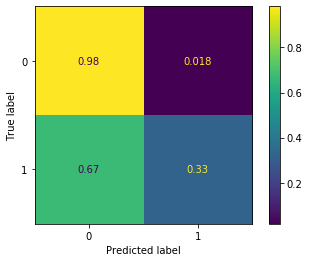

In [25]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier 
plot_confusion_matrix( xg_model,X_val, y_val,normalize='true')

In [26]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [28]:
# Optimize model paramaters 
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3,5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.5min finished


{'gamma': 1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score


# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_val)

# Get error rate
print("Error rate of the  XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the  XGB classifier:  0.10837229069273269


Our model has been improved 

In [30]:
# Get the predicted result for the test Data
test_data.bank_account = xgb_model.predict(processed_test_data)

In [31]:
# create submission DataFrame
submission = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],

"bank_account": test_data.bank_account})

In [32]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
415,uniqueid_6484 x Kenya,0
5296,uniqueid_11431 x Rwanda,0
6820,uniqueid_7095 x Tanzania,0
4300,uniqueid_10435 x Rwanda,0
8934,uniqueid_9209 x Tanzania,0


In [34]:
# Create submission csv file
submission.to_csv('data/submissions/first_submission.csv', index = False)

Upload your **first_submission.csv** in the zindi competition